# Chapter 5. *Ab initio* Calculation

*Ab initio* is a Latin term that translates to "from the beginning." In the context of computational chemistry, ab initio methods refer to quantum mechanical calculations performed using the principles of quantum mechanics without any empirical data. These calculations aim to solve the Schrödinger equation for the system of interest from first principles.

Ab initio methods find applications in various areas:

- Molecular Structure Determination: Determining equilibrium structures of molecules.
- Reaction Pathways: Studying the mechanism of chemical reactions.
- Spectroscopy: Calculating molecular properties that can be compared with experimental spectra.

## 5.1. Hartree-Fock (HF) Theory

The Hartree-Fock method is one of the fundamental approaches in ab initio calculations. It involves approximating the many-electron wavefunction of a system as a product of single-electron wavefunctions (orbitals).

Main Concepts:

- Slater Determinant: Represents the antisymmetry property of electron wavefunctions.
- Electron Correlation: HF does not consider electron correlation, which leads to the difference between the HF energy and the exact non-relativistic energy.

## 5.2. Electron Correlation Methods

Post-Hartree-Fock methods aim to include the effects of electron correlation, which HF omits.

Popular Methods:

- Configuration Interaction (CI)
- Coupled Cluster (CC) Theory
- Many-Body Perturbation Theory (MBPT)

## 5.3. Basis Sets in *Ab Initio* Calculations

The choice of basis set is crucial in ab initio calculations. There are various basis sets tailored for different purposes:

- Minimal Basis Sets: e.g., STO-3G
- Split-Valence Basis Sets: e.g., 6-31G, 6-311G
- Polarization Functions: e.g., 6-31G*
- Diffuse Functions: e.g., 6-31+G

## 5.4. Advantages and Limitations

**Advantages:**

- Accuracy: Since ab initio methods are based on first principles, they can provide very accurate results when applied correctly.
- Generality: They can be applied to any molecular system without requiring any empirical data.

**Limitations:**

- Computational Cost: Ab initio methods can be computationally expensive, especially for larger molecules or systems.
- Basis Set Dependence: The accuracy of results often depends on the choice of basis set.

## 5.5. Self-Consistent Field (SCF) Method

The Self-Consistent Field (SCF) method is a foundational concept in ab initio calculations, particularly in the context of the Hartree-Fock (HF) theory and its extensions. SCF is a computational approach used to approximate the electronic structure of molecules in quantum chemistry.
Key Aspects of the SCF Method:

- **Iterative Procedure:** The SCF method employs an iterative process to solve the quantum mechanical equations. Starting with an initial guess of the wavefunction, it refines this guess in a series of steps to achieve a consistent solution that satisfies the Schrödinger equation for the system.

- **Fock Matrix and Density Matrix:** The method involves constructing and solving the Fock matrix, which depends on the electron density. The electron density is represented by the density matrix, which is updated in each iteration based on the current wavefunction.

- **Convergence Criteria:** The iterative process continues until the difference between successive approximations of the wavefunction (or the total energy) falls below a pre-defined threshold, indicating convergence to a self-consistent solution.
- **Role in Hartree-Fock Theory:** In Hartree-Fock theory, the SCF method is used to find the optimal set of molecular orbitals that minimize the total electronic energy of the system. This approach considers the mean-field approximation, where each electron moves in an average field created by all other electrons.

***Applications and Significance:***

- Electronic Structure Analysis: SCF is a critical step in determining the electronic structure of molecules and forms the basis for more complex computational methods, such as post-Hartree-Fock correlation techniques.
- Foundational for Advanced Methods: Methods like Density Functional Theory (DFT) and post-Hartree-Fock methods also use the SCF approach as a part of their computational process.

***Limitations:***

- Mean-Field Approximation: While the SCF method provides a robust framework, it relies on the mean-field approximation, which does not account for electron correlation effects adequately. This is particularly notable in the basic Hartree-Fock implementation.
- Initial Guess Dependency: The final converged solution can sometimes depend on the initial guess, particularly in systems with near-degenerate electronic states.

## 5.6. Running *Ab initio* Calculation

We will run *Ab initio* calculations using `psi4`, an open-source computation chemistry framework. To install `psi4`, run the following command:

In [ ]:
!conda install psi4 -c conda-forge/label/libint_dev

### 5.6.1. Energy Calculation

In the following section, we will calculate the energy of 1,3-butadiene conformers using Hartree-Fock method:

In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from utils import View3DModel
import psi4
import py3Dmol
from tqdm import tqdm # Used to make progress bar, run `!pip install tqdm`

In [2]:
# Create a molecule of 1,3-butadiene
mol = Chem.MolFromSmiles('C=CC=C')

# Prepare the molecule
mol = Chem.AddHs(mol)
Chem.rdDistGeom.EmbedMolecule(mol, useRandomCoords=True)
AllChem.UFFOptimizeMolecule(mol, maxIters=200)

0

In [3]:
# View 3D model with py3Dmol
View3DModel(mol)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [4]:
# Write the geometry to XYZ string
xyz_string = Chem.MolToXYZBlock(mol)

# Get the psi4 geometry
geometry = psi4.geometry(xyz_string)

In [5]:
# Set calculation options
psi4.set_options({'basis': 'STO-3G'})

In [6]:
# Perform Hartree-Fock calculation to compute the energy
energy = psi4.energy('HF') * psi4.constants.hartree2kcalmol # Convert from Hartrees to kcal/mol

# Print the calculated energy
print(f"The Hartree-Fock energy of 1,3-butadiene with the 3-21G basis set is: {energy:.6f} kcal/mol")

The Hartree-Fock energy of 1,3-butadiene with the 3-21G basis set is: -96020.058553 kcal/mol


Next, we will rotate the molecule around the C2-C3 bond, and calculate the energy for each comformers

In [7]:
# Defind a function that calculate HF energy
def calculate_HF_energy(mol, rotation_angle):
    # Rotate round C-C bond
    Chem.rdMolTransforms.SetDihedralDeg(mol.GetConformer(0), 0, 1, 2, 3, -180 + rotation_angle)
    
    # Write the geometry to XYZ string
    xyz_string = Chem.MolToXYZBlock(mol)

    # Get the psi4 geometry
    geometry = psi4.geometry(xyz_string)
    
    # Calculate the energy total energy using Hartree-Fock
    energy = psi4.energy('HF') * psi4.constants.hartree2kcalmol # Convert from Hartrees to kcal/mol
    
    return energy

Current angle: 360.0 degree: 100%|███████████████████████████████████████████████████| 121/121 [01:06<00:00,  1.82it/s]


Text(0, 0.5, 'Energy (kcal/mol)')

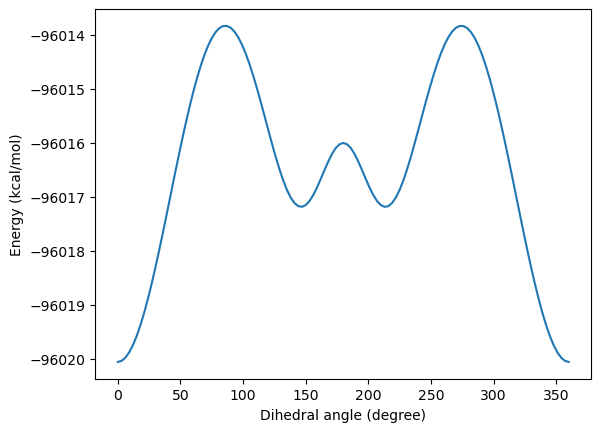

In [8]:
# Calculate an array of energies for all comformers
energy_arr = []
angles = np.linspace(0, 360, num=121) # rotate 3 degrees each time
progress_bar = tqdm(angles)
for angle in progress_bar:
    energy_arr.append(calculate_HF_energy(mol, angle))
    progress_bar.set_description(f'Current angle: {angle} degree')
energy_arr = np.array(energy_arr)
    
# Plot the result
plt.plot(angles, energy_arr)
plt.xlabel('Dihedral angle (degree)')
plt.ylabel('Energy (kcal/mol)')

### 5.6.2. Geometry Optimization

In the following section, we will optimize the geometry of a distorted D-glucose molecule using SCF method:

In [9]:
mol = Chem.MolFromPDBFile('.\\structures\\glucose.pdb')

# Prepare the molecule
mol = Chem.AddHs(mol)
Chem.rdDistGeom.EmbedMolecule(mol)

0

In [10]:
# View 3D model with py3Dmol
View3DModel(mol)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [11]:
# Write the geometry to XYZ string
xyz_string = Chem.MolToXYZBlock(mol)

# Get the psi4 geometry
geometry = psi4.geometry(xyz_string)

In [12]:
# Set calculation options
psi4.set_options({'BASIS': 'STO-3G'})

In [13]:
# Run SCF geometry optimization
max_iters = 500
_, wfn_history = psi4.optimize('SCF', molecule=geometry, optking__geom_maxiter=max_iters, return_history=True)

	Previous geometry is closer to target in internal coordinates, so using that one.

	Best geometry has RMS(Delta(q)) = 2.04e-04

	Change in internal coordinate of 5.34e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 4.
	Change in internal coordinate of 6.16e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 3.
	Change in internal coordinate of 6.82e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 2.
	Change in internal coordinate of 6.95e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 1.
	Change in internal coordinate of 5.07e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 6.
	Change in internal coordinate of 8.68e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 5.
	Change in internal coordinate of 1.04e+00 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 4.
	Change in internal coordinate of 1.12e+00 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 3.
	Change in inte

Optimizer: Optimization complete!


Now we can view the optimization result:

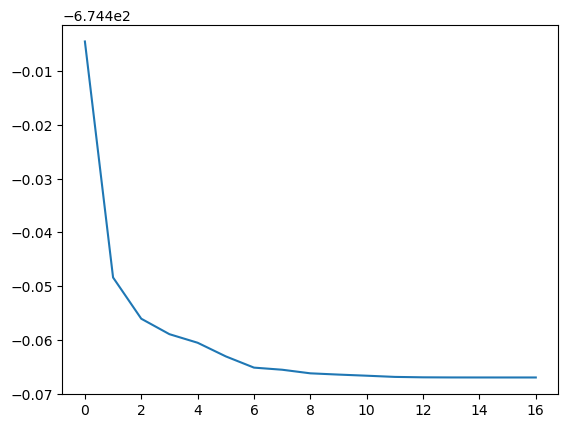

In [14]:
# Plot the energy values
energy_values = wfn_history['energy']
plt.plot(energy_values)

We can also view the conformers during the optimization process, or even make an animation:

In [15]:
# Get the list of coordinates
coordinates_list = wfn_history['coordinates']

# Get the number of conformers
num_confs = len(coordinates_list)
print(num_confs)

17


In [16]:
# Define a function to view the 3D model of a conformer
def show_geometry(mol, index):
    coords = coordinates_list[index]
    
    # Adjust the RDKit molecule's atom positions to match the current geometry
    conf = mol.GetConformer()
    for i, coord in enumerate(coords):
        conf.SetAtomPosition(i, coord)
    
    # Show the conformer
    View3DModel(mol)

In [17]:
# For example, visualize the last geometry:
show_geometry(mol, num_confs - 1)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [18]:
# Define a function to generate a PDB trajectory
def generate_pdb_trajectory(mol, coordinates_list):
    # Initialize the trajectory string
    trajectory = ""
        
    # Loop over each set of coordinates and generate the corresponding PDB format
    for idx, coordinates in enumerate(coordinates_list):
        # Adjust the molecule's atom positions to match the current geometry
        conf = mol.GetConformer()
        for i, coord in enumerate(coordinates):
            conf.SetAtomPosition(i, coord)
            
        # Add the records for atoms
        trajectory += "MODEL     {:4d}\n".format(idx + 1)
        trajectory += Chem.MolToPDBBlock(mol)
        trajectory += "ENDMDL\n"

    return trajectory

In [19]:
# Generate the PDB trajectory string
pdb_trajectory = generate_pdb_trajectory(mol, coordinates_list)

In [20]:
# Show the animation
view = py3Dmol.view(width=400, height=300)
view.addModelsAsFrames(pdb_trajectory, "trajectory", {'keepH': True})
view.setBackgroundColor('white')
view.setStyle({'stick': {'scale': 0.3}, 'sphere': {'scale': 0.3}})
view.zoomTo()
view.animate({'loop': "forward", 'interval': 200}) # Adjust the speed as needed (set 'interval' to a new value in millisecond)
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.